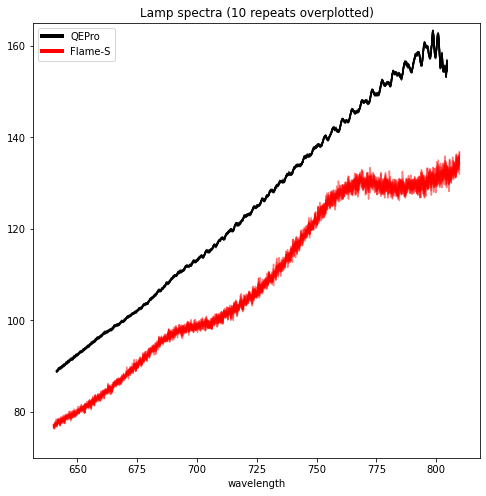

In [1]:
from piccololite import read_piccolo_sequence, RadiometricCorrection, sequence_to_datasets
import os

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

root = 'test/unit/data/'
cals = ['S_FLMS01691_CalCoeffs.csv', 'S_QEP00984_CalCoeffs.csv']
cal_paths = [os.path.join(root, x) for x in cals]
                          
pic_seq = read_piccolo_sequence(root)
rc = RadiometricCorrection(cal_paths)
corrected = rc.transform(pic_seq)

# Plotting
custom_lines = [Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], color='r', lw=4)]

f, ax = plt.subplots(figsize=(8,8))
for CAPTURE in corrected:
    corrected[CAPTURE]['S_FLMS01691']['Downwelling'].sel(wavelength=slice(640,810)).plot(c='r', ax=ax, alpha=.5)
    
for CAPTURE in corrected:
    corrected[CAPTURE]['S_QEP00984']['Downwelling'].plot(c='k', ax=ax, alpha=.5)
    
ax.set_ylim(70,165)
ax.legend(custom_lines, ['QEPro','Flame-S'])
ax.set_title('Lamp spectra (10 repeats overplotted)')

plt.savefig('plots/example.png', dpi=150)

Text(0.5, 1.0, 'Dark spectra (10 repeats overplotted)')

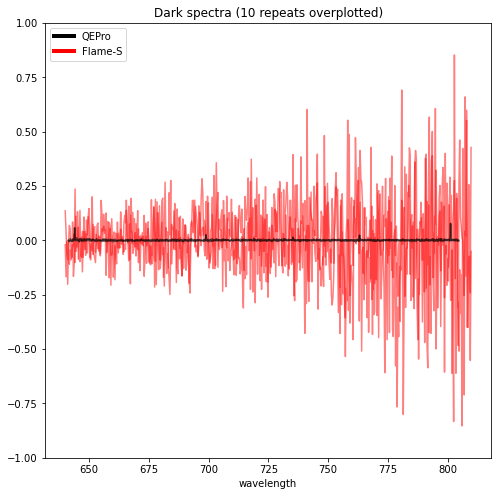

In [2]:
f, ax = plt.subplots(figsize=(8,8))
for CAPTURE in corrected:
    corrected[CAPTURE]['S_FLMS01691']['Downwelling'].sel(wavelength=slice(640,810)).plot(c='r', ax=ax, alpha=.5)
    
for CAPTURE in corrected:
    corrected[CAPTURE]['S_QEP00984']['Downwelling'].plot(c='k', ax=ax, alpha=.5)
    
ax.set_ylim(-1,1)
ax.legend(custom_lines, ['QEPro','Flame-S'])
ax.set_title('Dark spectra (10 repeats overplotted)')

In [3]:
print('b000000_s000000_dark.pico:')
print(
    'QE Pro Dark Noise: {:.4f}\nFlame-S Dark Noise {:.4f}'.format(
        float(corrected['b000000_s000000_dark.pico']['S_QEP00984']['Downwelling'].std()),
        float(corrected['b000000_s000000_dark.pico']['S_FLMS01691']['Downwelling'].std()))
)

b000000_s000000_dark.pico:
QE Pro Dark Noise: 0.0041
Flame-S Dark Noise 2150.9295


In [4]:
print('b000000_s000009_dark.pico:')
print(
    'QE Pro Dark Noise: {:.4f}\nFlame-S Dark Noise {:.4f}'.format(
        float(corrected['b000000_s000009_dark.pico']['S_QEP00984']['Downwelling'].std()),
        float(corrected['b000000_s000009_dark.pico']['S_FLMS01691']['Downwelling'].std()))
)

b000000_s000009_dark.pico:
QE Pro Dark Noise: 0.0040
Flame-S Dark Noise 2150.9185


In [5]:
sequence_to_datasets(corrected)['S_QEP00984'].data_vars

Data variables:
    b000000_s000007_light_S_QEP00984_Upwelling    (wavelength) float64 0.0386...
    b000000_s000007_light_S_QEP00984_Downwelling  (wavelength) float64 89.06 ...
    b000000_s000002_light_S_QEP00984_Upwelling    (wavelength) float64 -0.014...
    b000000_s000002_light_S_QEP00984_Downwelling  (wavelength) float64 88.97 ...
    b000000_s000000_dark_S_QEP00984_Upwelling     (wavelength) float64 -0.032...
    b000000_s000000_dark_S_QEP00984_Downwelling   (wavelength) float64 0.0004...
    b000000_s000008_light_S_QEP00984_Upwelling    (wavelength) float64 0.0031...
    b000000_s000008_light_S_QEP00984_Downwelling  (wavelength) float64 89.1 ....
    b000000_s000005_light_S_QEP00984_Upwelling    (wavelength) float64 -0.014...
    b000000_s000005_light_S_QEP00984_Downwelling  (wavelength) float64 88.9 ....
    b000000_s000000_light_S_QEP00984_Upwelling    (wavelength) float64 -0.014...
    b000000_s000000_light_S_QEP00984_Downwelling  (wavelength) float64 88.82 ...
    b000000_

In [6]:
sequence_to_datasets(corrected)['S_QEP00984']['b000000_s000007_light_S_QEP00984_Downwelling'].attrs

{'Batch': 'False',
 'Dark': 'False',
 'Datetime': '2020-05-30T12:38:41.972931Z',
 'Direction': 'Downwelling',
 'IntegrationTime': 500.0,
 'IntegrationTimeUnits': 'milliseconds',
 'NonlinearityCorrectionCoefficients': [0.9984610080718994,
  -9.733199846095886e-08,
  9.514319887493627e-12,
  -2.945300052516897e-16,
  4.510480170932413e-21,
  -3.6650400619370433e-26,
  1.4925200050639148e-31,
  -2.4006700010871156e-37],
 'OpticalPixelRange': [10, 1033],
 'Run': '200530_ConTest_Dn_1',
 'SaturationLevel': 200000,
 'SequenceNumber': 7,
 'SerialNumber': 'QEP00984',
 'TemperatureDetectorActual': -9.804666519165039,
 'TemperatureDetectorSet': -10.0,
 'TemperatureHeatsink': 'None',
 'TemperatureMicrocontroller': 50.40283203125,
 'TemperaturePCB': 30.950204849243164,
 'TemperatureUnits': 'degrees Celcius',
 'Type': 'light',
 'WavelengthCalibrationCoefficients': [639.5326538085938,
  0.1779545247554779,
  -1.8008253391599283e-05,
  5.607220243675215e-10],
 'WavelengthCalibrationCoefficientsPiccolo